## [당뇨병 데이터로 딥러닝 분류 수행]

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [21]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

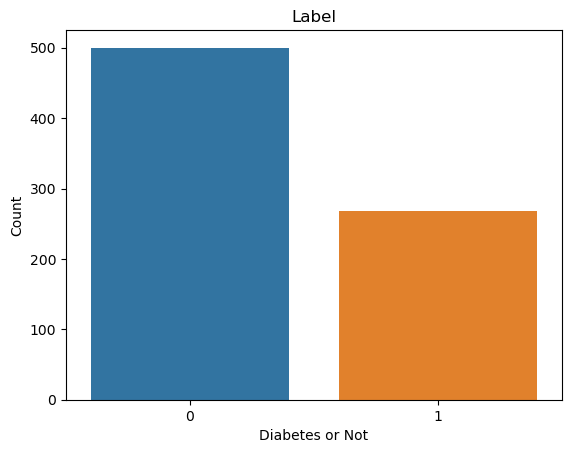

In [22]:
# label 개수 확인 (그래프)
sns.countplot(data=df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Label")

In [6]:
# label 개수 확인
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/var/folders/32/6pqz7kq921q36tq18z9vnhrm0000gn/T/ipykernel_36731/2551426308.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


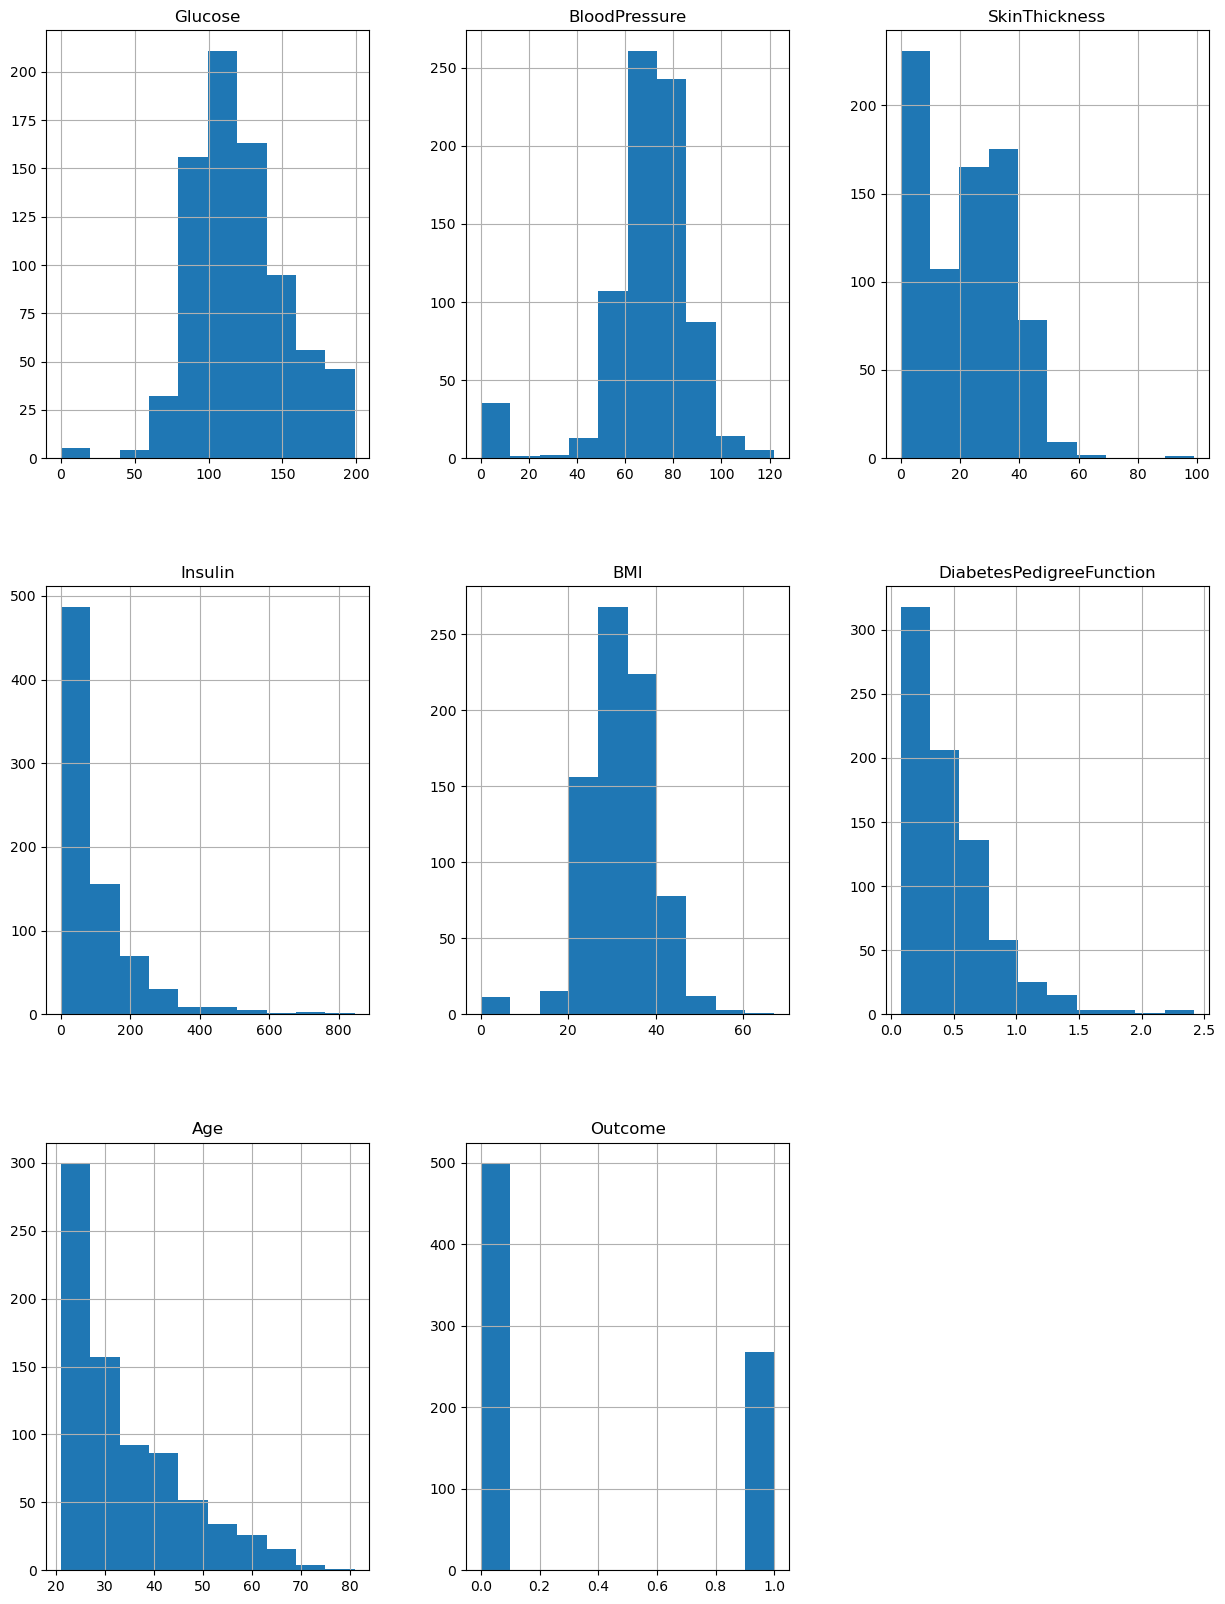

In [23]:
# 각 컬럼별 히스토그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [45]:
X = df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [46]:
y = df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [47]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [29]:
# train/test dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## [모델 생성, 학습, 예측 및 평가]

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(32, input_shape=(7, ), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(learning_rate=0.1), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [53]:
from sklearn.metrics import accuracy_score

model_history = model.fit(X_train, y_train, epochs=30, batch_size=42, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/30


2024-09-12 02:34:09.054868: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 5ms/step - loss: 2.3791 - accuracy: 0.6205 - val_loss: 0.6607 - val_accuracy: 0.6429
Epoch 2/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6531 - val_loss: 0.6541 - val_accuracy: 0.6429
Epoch 3/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6531 - val_loss: 0.6546 - val_accuracy: 0.6429
Epoch 4/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 5/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6531 - val_loss: 0.6518 - val_accuracy: 0.6429
Epoch 6/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6531 - val_loss: 0.6538 - val_accuracy: 0.6429
Epoch 7/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.6531 - val_loss: 0.6518 - val_accuracy: 0.6429
Epoch 8/30
15/15 [=============

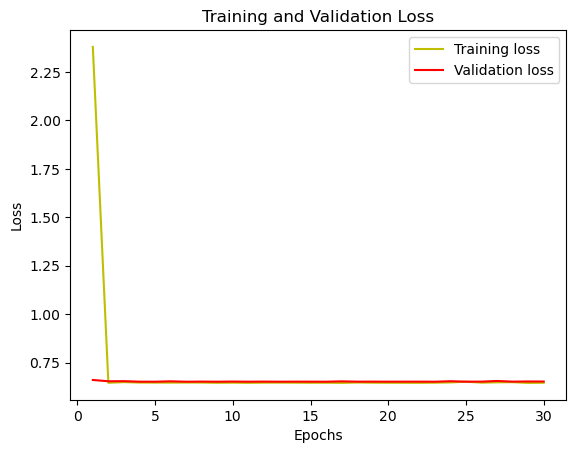

In [54]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

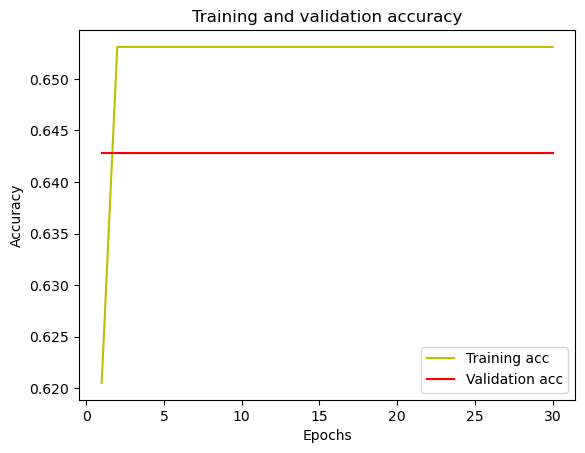

In [56]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()